In [133]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import pandas as pd
from sklearn.metrics import precision_score, recall_score

In [ ]:
presion_arterial = np.random.uniform(70, 180, 1500)
colesterol = np.random.uniform(120, 250, 1500)
prob_riesgo = (presion_arterial - 120) / 50 + (colesterol - 180) / 50
prob_riesgo = np.clip(prob_riesgo, 0, 1)
X = np.column_stack((presion_arterial, colesterol))
y = prob_riesgo > 0.5

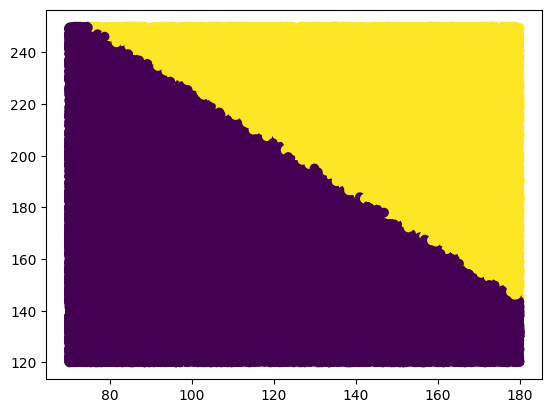

In [135]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7)

In [137]:
clf = MLPClassifier(
    solver="lbfgs", alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1
)
clf.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

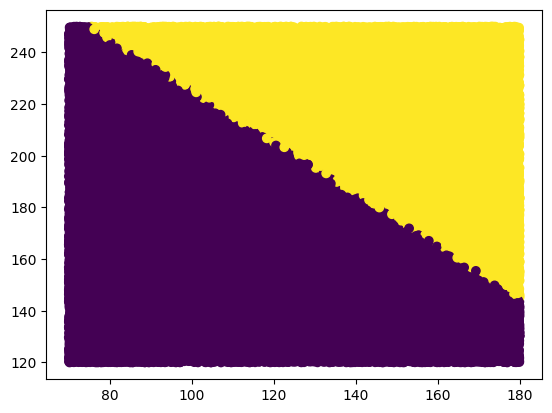

In [138]:
y_pred = clf.predict(X_test)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)
plt.show()

In [139]:
precision_score(y_test, y_pred), recall_score(y_test, y_pred)

(1.0, 0.9999504901475393)

In [144]:
clf = MLPClassifier(
    solver="adam",
    alpha=1e-5,
    learning_rate="adaptive",
    hidden_layer_sizes=(5, 2),
    random_state=1,
)
clf.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), learning_rate='adaptive',
              random_state=1)

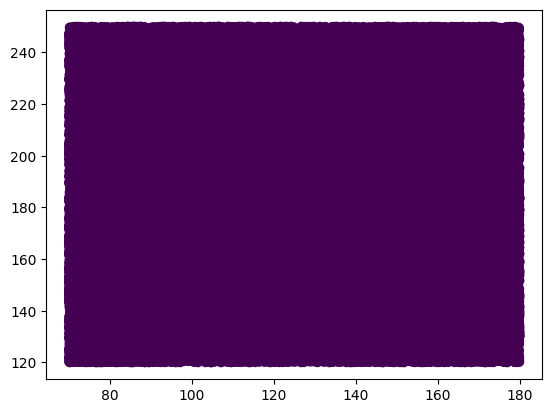

In [145]:
y_pred = clf.predict(X_test)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)
plt.show()